<a href="https://colab.research.google.com/github/ducle2502/Time-Series-Stock-Forecasting---N-Beats/blob/main/DL_Project_NBeats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
import pandas as pd
!pip install darts
from darts import TimeSeries
!pip install cloud-tpu-client==0.10 https://storage.googleapis.com/tpu-pytorch/wheels/torch_xla-1.9-cp37-cp37m-linux_x86_64.whl
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchtext==0.10.0 -f https://download.pytorch.org/whl/cu111/torch_stable.html
!pip install pyyaml==5.4.1

drive.mount('/content/drive')
path = "/content/drive/MyDrive/0_Time_Series_with_RNN/DL_Project"
%cd {path}
!ls

#%cd darts
#!python setup.py install

In [ ]:
VNM = pd.read_csv("/content/drive/MyDrive/0_Time_Series_with_RNN/DL_Project/RAW DATA/VNM.csv")
VNM.sort_values("DTYYYYMMDD",ascending = True, inplace = True)
VNM['Index'] = range(0, VNM.shape[0])
VNM

In [4]:
ts = TimeSeries.from_dataframe(VNM, time_col="Index", value_cols="High")

train, val = ts[:-10], ts[-10:]

In [ ]:
from darts.models import NBEATSModel

naive_model = NBEATSModel(input_chunk_length=60,output_chunk_length=10,torch_device_str="auto")
naive_model.fit(train)


In [ ]:
naive_model.save_model("1st_run.pth.tar")
naive_forecast = naive_model.predict(10)

val.plot(label="actual")
naive_forecast.plot(label="naive forecast")

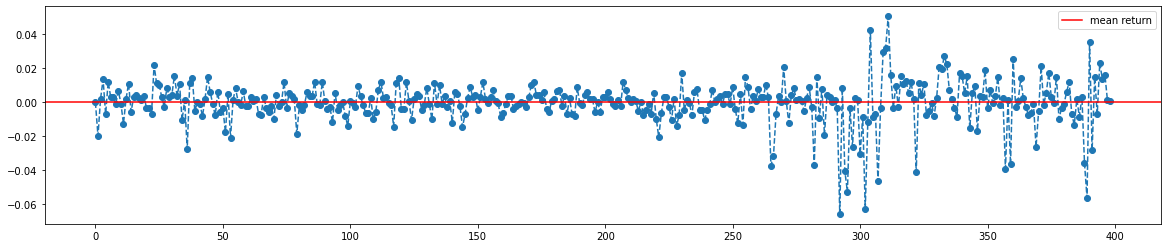

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
plt.plot(r_t, linestyle='--', marker='o')
plt.axhline(y=mean, label='mean return', c='red')
plt.legend()
plt.show()

Kiểm tra chuỗi có phải nhiễu trắng hay không ?
* Kỳ vọng bằng 0
* Phương sai không đổi
* Không có hiện tượng tự tương quan. --> visualize $r_{t-1}$ và $r_t$.

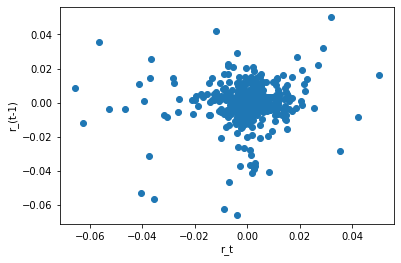

In [ ]:
plt.scatter(x = r_t[:-1], y = r_t[1:])
plt.xlabel('r_t')
plt.ylabel('r_(t-1)')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Text(0, 0.5, 'frequency')

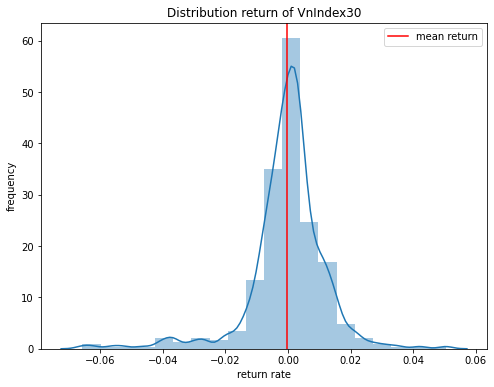

In [ ]:
# Kiểm tra phân phối chuẩn
import seaborn as sns

plt.figure(figsize = (8, 6))
sns.distplot(r_t, bins = 20)
plt.axvline(x=mean, label='mean return', c='red')
plt.title('Distribution return of VnIndex30')
plt.legend()
plt.xlabel('return rate')
plt.ylabel('frequency')